In [117]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [92]:
folder = "Data"
match_file = "estadisticas_partidos.csv"

path_matches = os.path.join(folder, match_file)
matches = pd.read_csv(path_matches)

In [93]:
print(matches.columns.values)
print(len(matches.columns.values))

['team_home' 'team_away' 'score_home' 'score_away' 'expected_goals_home'
 'expected_goals_away' 'posession_home' 'posession_away'
 'total_shots_home' 'total_shots_away' 'shots_on_target_home'
 'shots_on_target_away' 'shots_off_target_home' 'shots_off_target_away'
 'blocked_shots_home' 'blocked_shots_away' 'corner_kicks_home'
 'corner_kicks_away' 'offsides_home' 'offsides_away' 'fouls_home'
 'fouls_away' 'yellow_cards_home' 'yellow_cards_away' 'red_cards_home'
 'red_cards_away' 'free_kicks_home' 'free_kicks_away' 'throw_ins_home'
 'throw_ins_away' 'goal_kicks_home' 'goal_kicks_away'
 'shots_inside_box_home' 'shots_inside_box_away' 'shots_outside_box_home'
 'shots_outside_box_away' 'goalkeeper_saves_home' 'goalkeeper_saves_away'
 'passes_home' 'passes_away' 'accurate_passes_home' 'accurate_passes_away'
 'long_balls_home' 'long_balls_away' 'crosses_home' 'crosses_away'
 'dribbles_home' 'dribbles_away' 'possesion_lost_home'
 'possesion_lost_away' 'duels_won_home' 'duels_won_away'
 'aerials

In [94]:
matches.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_home               240 non-null    object 
 1   team_away               240 non-null    object 
 2   score_home              240 non-null    int64  
 3   score_away              240 non-null    int64  
 4   expected_goals_home     240 non-null    float64
 5   expected_goals_away     240 non-null    float64
 6   posession_home          240 non-null    int64  
 7   posession_away          240 non-null    int64  
 8   total_shots_home        240 non-null    int64  
 9   total_shots_away        240 non-null    int64  
 10  shots_on_target_home    240 non-null    int64  
 11  shots_on_target_away    240 non-null    int64  
 12  shots_off_target_home   240 non-null    int64  
 13  shots_off_target_away   240 non-null    int64  
 14  blocked_shots_home      240 non-null    in

Hay que agregar la columna de etiqueta, empatan 0; gana equipo local 1, gana equipo visita 2

In [95]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["score_home"] > match["score_away"]:
        results.append(1)
    elif match["score_home"] < match["score_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results


In [96]:
matches.head()

,team_home,team_away,score_home,score_away,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,total_shots_away,...,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away,result
0,Curicó Unido,Colo Colo,0,1,0.07,2.31,32,68,5,20,...,33,4,11,11,8,5,8,23,8,2
1,Huachipato,Audax Italiano,2,0,1.34,0.45,64,36,12,13,...,35,13,9,12,12,7,4,19,28,1
2,Unión Española,Cobresal,1,0,1.09,0.54,65,35,26,9,...,66,18,14,18,19,3,11,24,24,1
3,Deportes Copiapó,Everton de Viña del Mar,2,0,1.21,0.59,36,64,10,12,...,35,11,9,13,9,7,2,28,13,1
4,Deportes Magallanes,Coquimbo Unido,2,3,1.62,1.82,57,43,13,15,...,32,9,11,10,6,5,1,16,20,2


In [97]:
matches.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_home               240 non-null    object 
 1   team_away               240 non-null    object 
 2   score_home              240 non-null    int64  
 3   score_away              240 non-null    int64  
 4   expected_goals_home     240 non-null    float64
 5   expected_goals_away     240 non-null    float64
 6   posession_home          240 non-null    int64  
 7   posession_away          240 non-null    int64  
 8   total_shots_home        240 non-null    int64  
 9   total_shots_away        240 non-null    int64  
 10  shots_on_target_home    240 non-null    int64  
 11  shots_on_target_away    240 non-null    int64  
 12  shots_off_target_home   240 non-null    int64  
 13  shots_off_target_away   240 non-null    int64  
 14  blocked_shots_home      240 non-null    in

Preparación de data para modelo

In [98]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos")

Resultado 0, hay: 59 partidos
Resultado 1, hay: 97 partidos
Resultado 2, hay: 84 partidos


In [99]:
result = matches["result"]
matches = matches.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away"])
matches.head()

,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,shots_off_target_home,shots_off_target_away,...,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away
0,0.07,2.31,32,68,5,20,1,8,4,5,...,29,33,4,11,11,8,5,8,23,8
1,1.34,0.45,64,36,12,13,5,4,4,6,...,45,35,13,9,12,12,7,4,19,28
2,1.09,0.54,65,35,26,9,7,2,10,5,...,59,66,18,14,18,19,3,11,24,24
3,1.21,0.59,36,64,10,12,4,2,6,5,...,35,35,11,9,13,9,7,2,28,13
4,1.62,1.82,57,43,13,15,4,7,3,8,...,34,32,9,11,10,6,5,1,16,20


In [100]:
X = matches.to_numpy()
scaler = preprocessing.MinMaxScaler()
X_escalados = scaler.fit_transform(X)
y = result

In [101]:
y.unique()

array([2, 1, 0], dtype=int64)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_escalados, y, test_size=0.3, random_state = 1)

# Modelo 1: Regresión Logística

In [103]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.58      0.96      0.72        23
           2       0.70      0.70      0.70        27

    accuracy                           0.62        72
   macro avg       0.62      0.61      0.57        72
weighted avg       0.62      0.62      0.58        72



In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


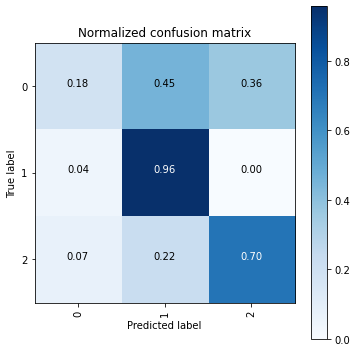

In [114]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

# Modelo 2: SVM

In [115]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.33      0.05      0.08        22
           1       0.51      1.00      0.68        23
           2       0.71      0.63      0.67        27

    accuracy                           0.57        72
   macro avg       0.52      0.56      0.47        72
weighted avg       0.53      0.57      0.49        72



Normalized confusion matrix


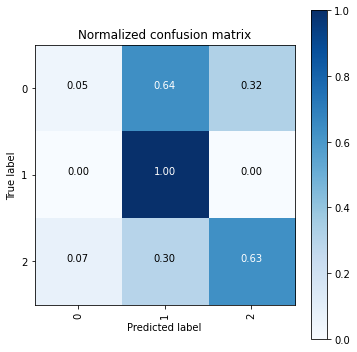

In [116]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

# Modelo 3: Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.4722222222222222
For min_samples_split = 50 and t = 100 The accuracy is : 0.4583333333333333
For min_samples_split = 50 and t = 200 The accuracy is : 0.4722222222222222
For min_samples_split = 50 and t = 500 The accuracy is : 0.4722222222222222
For min_samples_split = 50 and t = 1000 The accuracy is : 0.4722222222222222
For min_samples_split = 20 and t = 50 The accuracy is : 0.4861111111111111
For min_samples_split = 20 and t = 100 The accuracy is : 0.4861111111111111
For min_samples_split = 20 and t = 200 The accuracy is : 0.4583333333333333
For min_samples_split = 20 and t = 500 The accuracy is : 0.4722222222222222
For min_samples_split = 20 and t = 1000 The accuracy is : 0.4722222222222222
For min_samples_split = 10 and t = 50 The accuracy is : 0.5
For min_samples_split = 10 and t = 100 The accuracy is : 0.5277777777777778
For min_samples_split = 10 and t = 200 The accuracy is : 0.5138888888888888
For min_samples_split = 10 a

In [119]:
rf = RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        22
           1       0.51      0.91      0.66        23
           2       0.59      0.59      0.59        27

    accuracy                           0.54        72
   macro avg       0.53      0.53      0.47        72
weighted avg       0.54      0.54      0.48        72



Normalized confusion matrix


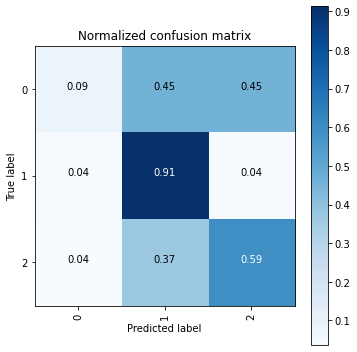

In [120]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

# Modelo 4: AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.625
For max_depth = 2 and t = 100 The accuracy is : 0.6666666666666666
For max_depth = 2 and t = 200 The accuracy is : 0.6111111111111112
For max_depth = 2 and t = 500 The accuracy is : 0.5972222222222222
For max_depth = 2 and t = 1000 The accuracy is : 0.6111111111111112
For max_depth = 3 and t = 50 The accuracy is : 0.4166666666666667
For max_depth = 3 and t = 100 The accuracy is : 0.4861111111111111
For max_depth = 3 and t = 200 The accuracy is : 0.5694444444444444
For max_depth = 3 and t = 500 The accuracy is : 0.5972222222222222
For max_depth = 3 and t = 1000 The accuracy is : 0.5833333333333334
For max_depth = 4 and t = 50 The accuracy is : 0.5416666666666666
For max_depth = 4 and t = 100 The accuracy is : 0.5
For max_depth = 4 and t = 200 The accuracy is : 0.5694444444444444
For max_depth = 4 and t = 500 The accuracy is : 0.5
For max_depth = 4 and t = 1000 The accuracy is : 0.5972222222222222
For max_depth = 5 and t = 50 The accur

In [123]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0)

ada.fit(X_train, y_train)

predicted_ada = ada.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_ada))

Clasification report
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.56      0.83      0.67        23
           2       0.83      0.70      0.76        27

    accuracy                           0.67        72
   macro avg       0.68      0.66      0.66        72
weighted avg       0.69      0.67      0.66        72



Normalized confusion matrix


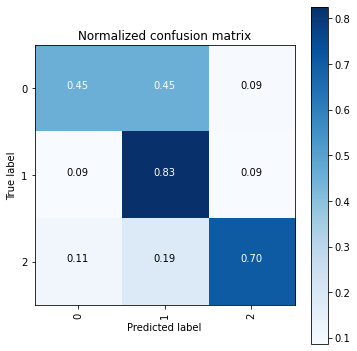

In [124]:
cnf_matrix = confusion_matrix(y_test, predicted_ada)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

# Modelo 5: MLP

In [167]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                3648      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 5827 (22.76 KB)
Trainable params: 5827 (22.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [175]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 1s 55ms/step - loss: 0.9013 - accuracy: 0.6111 - val_loss: 1.0476 - val_accuracy: 0.4524
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.8756 - accuracy: 0.6429 - val_loss: 1.0358 - val_accuracy: 0.4762
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.8682 - accuracy: 0.6429 - val_loss: 1.0364 - val_accuracy: 0.4524
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.8474 - accuracy: 0.6508 - val_loss: 1.0257 - val_accuracy: 0.4286
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 0.8353 - accuracy: 0.6429 - val_loss: 1.0217 - val_accuracy: 0.4524
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.8226 - accuracy: 0.6667 - val_loss: 1.0289 - val_accuracy: 0.4524
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 0.8116 - accuracy: 0.6667 - val_loss: 1.0219 - val_accuracy: 0.4524
Epoch 8/10
4/4 [=============

In [184]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

3/3 [==============================] - 0s 2ms/step


In [185]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.51      0.83      0.63        23
           2       0.54      0.70      0.61        27

    accuracy                           0.53        72
   macro avg       0.35      0.51      0.42        72
weighted avg       0.37      0.53      0.43        72



c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Normalized confusion matrix


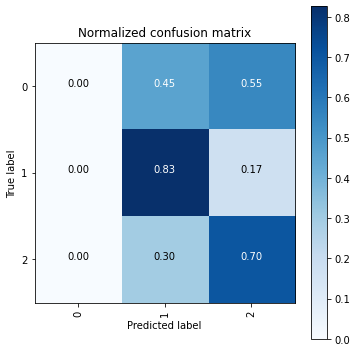

In [186]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()